In [27]:
import numpy as np

In [28]:
class RidgeReg():
    def __init__(self,X,intercept=True,lam = 10**np.linspace(-6, 3, num=300, endpoint=True)):
        self.p = X.shape[1]
        self.n = X.shape[0]
        self.intercept = intercept
        self.lam = lam
        
    def design_matrix(self,X,y):
        if self.intercept:
            ones = np.ones((X.shape[0],1))
            X = np.hstack([ones, X])
        y = y.reshape((-1,1))
        return X,y
    
    def fit(self, X, y):
        X, y = self.design_matrix(X,y)
        self.beta_rec = np.zeros((len(self.lam),X.shape[1]))
        self.mse_rec = np.zeros((len(self.lam),1))
        for i, l in enumerate(self.lam):
            beta_hat = np.linalg.inv(X.T@X+ l*np.identity(self.p))@(X.T@y)
            y_hat = X@beta_hat
            mse = np.mean(np.power((y_hat-y),2))
            
            self.beta_rec[i,:] = beta_hat.reshape(len(beta_hat))
            self.mse_rec[i] = mse
        

In [29]:
# Generate Training data
from scipy.stats import multivariate_normal
def X_data_generation(r, samples, features):
    a = np.zeros((features, features))
    b = a.copy()
    
    for i in range(features):
        a[i, :] = i + 1
    
    for j in range(features):
        b[:, j] = j + 1
    
    dc = r**np.abs(a - b)
    mean_vector = np.zeros(dc.shape[0])
    X = multivariate_normal.rvs(mean=mean_vector, cov=dc, size=samples)
    
    return X

def beta_initiate(features):
    s = np.concatenate((np.linspace(1, 2.9, features), np.linspace(-2.9, -1, features)))
    theta = np.matrix(np.random.choice(s, size=features)).T
    theta[4, 0] = 1.1
    
    return theta

def Y_data_generation(X, beta):
    ebr = np.random.normal(0, 1, size=(X.shape[0],1))
    Y = X@beta + ebr
    return Y

In [30]:
# generate training data
r = 0.5
samples = 20
features = 50

X = X_data_generation(r, samples, features)
init_beta = beta_initiate(features)
y = Y_data_generation(X, init_beta)

In [31]:
init_beta.shape,X.shape,y.shape

((50, 1), (20, 50), (20, 1))

In [32]:
Rg = RidgeReg(X,intercept = False)
Rg.fit(X,y)

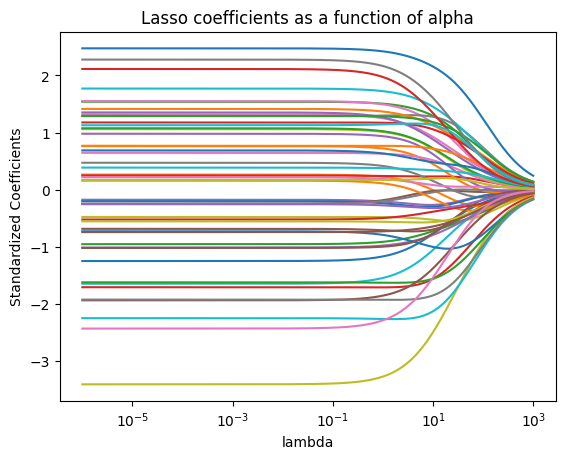

In [33]:
import matplotlib.pyplot as plt
ax = plt.gca()

ax.plot(Rg.lam, Rg.beta_rec)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [34]:
lambd = 10**np.linspace(-7, 3, num=300, endpoint=True)
Rg = RidgeReg(X,intercept = False,lam = lambd)
Rg.fit(X,y)

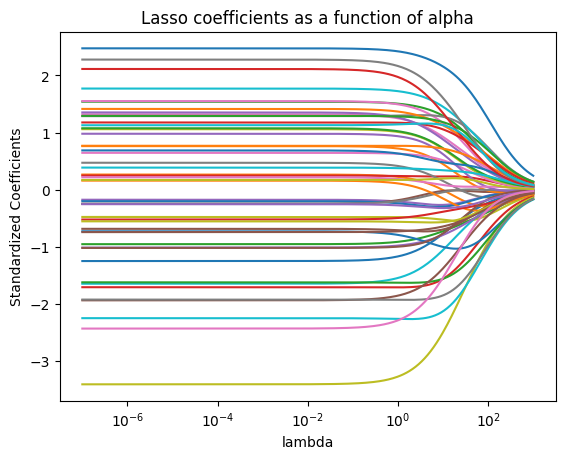

In [35]:
import matplotlib.pyplot as plt
ax = plt.gca()

ax.plot(Rg.lam, Rg.beta_rec)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

In [36]:
# find the optimal coefficients
optIndex = np.argmin(Rg.mse_rec)
opt_beta = Rg.beta_rec[optIndex,:]
print("the best coeffcients:\n", opt_beta)
print("the optimal lambda:\n", Rg.lam[optIndex])

the best coeffcients:
 [-1.25448884  0.26270775  1.54005206  0.24531468 -0.17897565 -0.2513318
  1.55091953  0.46952634 -0.48086795 -1.65238197 -0.20471853  0.76144344
 -0.95855165 -1.71327148 -1.01789395 -0.68915592  0.64352287 -0.24942509
 -3.41623694 -2.25591749 -0.73233054  0.15622438 -1.62728443 -0.52594687
  0.9781996  -1.0247715   1.31819354  1.28711055  1.05855311  1.77087172
  2.47624659  1.41382323  1.0747791   1.17618881  1.35208738 -1.94333948
  0.21470533 -1.93023662 -0.55775627  0.38468083  0.686069    0.76732302
  1.29134846  2.11413882 -0.2569389  -0.74678977 -2.43861644  2.27916002
  0.16719265  1.12707278]
the optimal lambda:
 5.038962625065151e-07


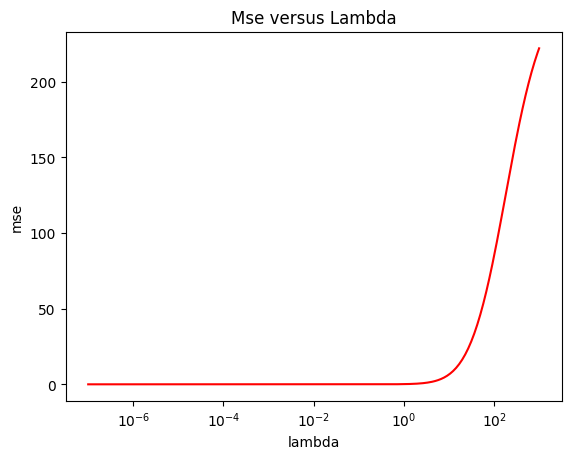

In [37]:
ax = plt.gca()
ax.set_xscale('log')
plt.plot(Rg.lam,Rg.mse_rec,c="red")
plt.xlabel('lambda')
plt.ylabel('mse')
plt.title('Mse versus Lambda')
plt.show()